In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import roc_auc_score, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn import linear_model


import warnings
warnings.filterwarnings("ignore")

# Redes neuronales

## Forward Propagation 
La **propagación hacia adelante** (forward propagation) es el proceso por el cual una red neuronal transforma una entrada en una salida a través de sus capas. 

1. **Capa de Entrada:**  
   La información inicial (por ejemplo, los píxeles de una imagen o características de un dato) se ingresa a la red a través de la capa de entrada. Cada nodo en esta capa representa una característica.

2. **Cálculo en Cada Neurona de una Capa Oculta:**  
   Cada neurona en una capa oculta realiza dos operaciones fundamentales:
   
   - **Suma Ponderada:**  
     Calcula una combinación lineal de las entradas, usando unos pesos $W$ y un sesgo $b$:
     $$
     z^{[l]} = W^{[l]} a^{[l-1]} + b^{[l]}
     $$
     donde:
     - $a^{[l-1]}$ son las activaciones (o salidas) de la capa anterior.
     - $W^{[l]}$ es la matriz de pesos que conecta la capa anterior con la capa $l$.
     - $b^{[l]}$ es el vector de sesgos de la capa $l$.

   - **Función de Activación:**  
     La suma ponderada $z^{[l]}$se pasa a través de una función de activación $g$ para introducir no linealidad:
     $$
     a^{[l]} = g(z^{[l]})
     $$
     Por ejemplo, \( g \) podría ser la función ReLU, sigmoide o tanh.

3. **Propagación a Través de las Capas:**  
   Este proceso se repite en cada capa oculta. Los valores \( a^{[l]} \) calculados en cada capa se utilizan como entrada para la siguiente.

4. **Capa de Salida:**  
   Finalmente, en la capa de salida se realiza el mismo proceso para obtener el resultado final del modelo. En tareas de clasificación, por ejemplo, se puede usar una función de activación sigmoide para obtener una probabilidad.

---

**Ejemplo Visual:**

Supongamos que tienes una red neuronal simple para clasificación binaria:
- **Entrada:** Un vector \( x \) con \( n \) características.
- **Capa Oculta:** Una única capa oculta con \( m \) neuronas.
- **Salida:** Una sola neurona que da la probabilidad de la clase positiva.

El proceso sería:

1. **Capa de Entrada:**  
   $a^{[0]} = x$)

2. **Capa Oculta:**
   - Cálculo lineal:  
     $z^{[1]} = W^{[1]} x + b^{[1]}$
   - Activación:  
     $a^{[1]} = g(z^{[1]})$  
     (por ejemplo, usando ReLU: $a^{[1]} = \max(0, z^{[1]})$

3. **Capa de Salida:**
   - Cálculo lineal:  
     $z^{[2]} = W^{[2]} a^{[1]} + b^{[2]}$
   - Activación:  
     $a^{[2]} = \sigma(z^{[2]})$
     (usando la función sigmoide, $\sigma(z) = \frac{1}{1+e^{-z}}$, para obtener una probabilidad)

El resultado $a^{[2]}$ es la salida final de la red.

Esta explicación ilustra cómo la información se transforma a medida que avanza por la red neuronal, utilizando combinaciones lineales y funciones de activación para capturar relaciones complejas en los datos.


## Backpropagation 


**Backpropagation** es el algoritmo fundamental para entrenar redes neuronales. Permite calcular, de manera eficiente, los gradientes de la función de costo respecto a cada uno de los parámetros (pesos y sesgos) de la red. Estos gradientes se utilizan para actualizar los parámetros en la dirección que minimice el error del modelo, generalmente usando algún método de descenso de gradiente.

### ¿Cómo funciona?

La idea central es aplicar la **regla de la cadena** para propagar el error desde la salida de la red hacia las capas anteriores.

1. **Propagación hacia adelante (Forward Propagation):**  
   Primero se calcula la salida de la red:
   - Cada capa calcula:
     $$
     z^{[l]} = W^{[l]}a^{[l-1]} + b^{[l]}
     $$
     $$
     a^{[l]} = g(z^{[l]})
     $$
     donde \( g \) es la función de activación.

2. **Cálculo del error en la capa de salida:**  
   Se mide la diferencia entre la salida predicha $a^{[L]}$ y el valor real $y$. Por ejemplo, para una función de costo $J$ (como la entropía cruzada), se calcula:
   $$
   \delta^{[L]} = \frac{\partial J}{\partial z^{[L]}} = (a^{[L]} - y) \odot g'(z^{[L]})
   $$
   donde $g'(z^{[L]})$ es la derivada de la función de activación en la capa de salida y $\odot$ denota la multiplicación elemento a elemento.

3. **Propagación del error hacia atrás:**  
   Para cada capa $l$ de $L-1$ hasta la primera capa oculta), se calcula:
   $$
   \delta^{[l]} = \left(W^{[l+1]}\right)^T \delta^{[l+1]} \odot g'(z^{[l]})
   $$
   Esto permite distribuir el error calculado en la capa de salida a todas las neuronas de las capas anteriores, de manera que cada parámetro se ajuste en función de su contribución al error final.

4. **Cálculo de los gradientes:**  
   Una vez obtenidos los $\delta$ (errores) para cada capa, se calculan los gradientes de la función de costo respecto a los pesos y sesgos:
   $$
   \frac{\partial J}{\partial W^{[l]}} = \delta^{[l]} \left(a^{[l-1]}\right)^T
   $$
   $$
   \frac{\partial J}{\partial b^{[l]}} = \delta^{[l]}
   $$

5. **Actualización de parámetros:**  
   Con un factor de aprendizaje $\alpha$, se actualizan los parámetros:
   $$
   W^{[l]} = W^{[l]} - \alpha \frac{\partial J}{\partial W^{[l]}}
   $$
   $$
   b^{[l]} = b^{[l]} - \alpha \frac{\partial J}{\partial b^{[l]}}
   $$

Este proceso se repite para cada ejemplo (o en lotes de ejemplos) durante el entrenamiento de la red, ajustando los parámetros poco a poco para minimizar la función de costo.

---

**Resumen:**

- **Backpropagation** es el algoritmo que permite entrenar redes neuronales calculando los gradientes de la función de costo respecto a cada parámetro.
- Se utiliza la **regla de la cadena** para propagar el error desde la salida hasta las capas de entrada.
- Una vez calculados los gradientes, se actualizan los parámetros usando un método de optimización (como el descenso de gradiente).
- Este proceso es fundamental para que la red aprenda y mejore su capacidad de predicción.




## Funciones de activación
#### Tangente hipoerbolica

$$
\text{tanh}(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}
$$

Esto significa que:

- Para valores negativos de \(x\), la salida es negativa.
- Para valores positivos de \(x\), la salida es positiva.
- La salida está acotada entre -1 y 1 y, a diferencia de la sigmoide, está centrada en cero, lo que puede ayudar a una mejor convergencia durante el entrenamiento.


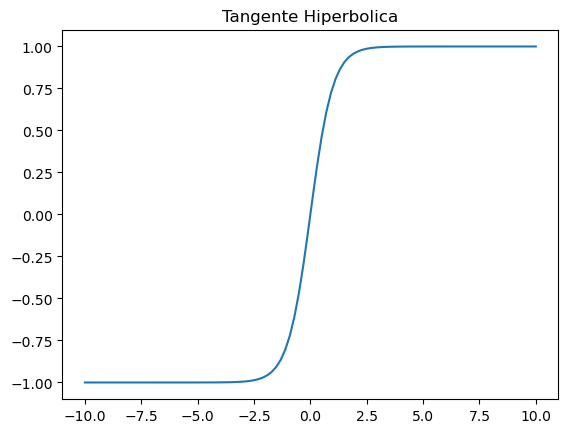

In [3]:
# Grafico de tangente hiperbolica
x = np.linspace(-10, 10, 100)
y = np.tanh(x)
plt.plot(x, y)
plt.title('Tangente Hiperbolica');

### Función de activación sigmoide
La **función sigmoide** es una función de activación que transforma cualquier valor de entrada en un rango entre 0 y 1. Se define matemáticamente como:

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

Donde \\( e \\) es la constante de Euler.


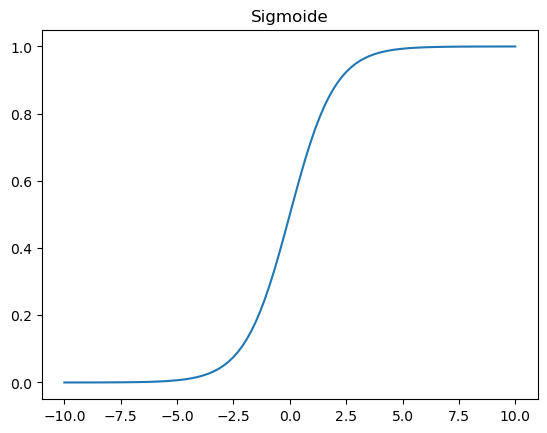

In [5]:
# Grafico de sigmoide 
def sigmoid(x):
    return 1/(1+np.exp(-x))

y = sigmoid(x)
plt.plot(x, y)
plt.title('Sigmoide');

### Función de Activación ReLU

La función de activación **ReLU** (Rectified Linear Unit) se define matemáticamente como:

$$
\text{ReLU}(x) = \max(0, x)
$$

Esto significa que, para cualquier valor de entrada \( x \):

- Si \( x \) es negativo, la salida es 0.
- Si \( x \) es positivo, la salida es \( x \).



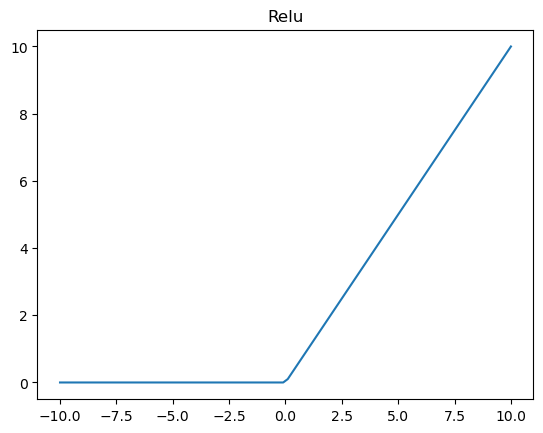

In [6]:
# Relu function 
def relu(x):
    return np.maximum(0, x)

y = relu(x)
plt.plot(x, y)
plt.title('Relu');

## Clasificación 
### Regresión logistica con el titanic

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# --- Limpieza de datos según lo indicado ---
df = pd.read_csv('titanic.csv')
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df = pd.get_dummies(df)
del df['Sex_female']
df['Age'] = df['Age'].fillna(df.Age.mean())

# Variables predictoras y variable objetivo
X = df.drop('Survived', axis=1)
y = df['Survived']

# --- División en conjunto de entrenamiento y test (80%-20%) ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [8]:
# Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures()),
    ('logistic', linear_model.LogisticRegression())
])

params_grid = {
    'poly__degree': [1, 2, 3],
    'logistic__penalty': [None, 'l2'],
}

In [9]:
# Grid Search 
grid_log = GridSearchCV(estimator=pipeline, param_grid=params_grid, cv=5, scoring='roc_auc')
grid_log.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('poly', PolynomialFeatures()),
                                       ('logistic', LogisticRegression())]),
             param_grid={'logistic__penalty': [None, 'l2'],
                         'poly__degree': [1, 2, 3]},
             scoring='roc_auc')

In [10]:
grid_log.best_params_

{'logistic__penalty': 'l2', 'poly__degree': 2}

In [11]:
# AUC 
predictions_log = grid_log.best_estimator_.predict_proba(X_test)[:, 1]
roc_auc_score(y_score=predictions_log, y_true=y_test)

0.8640316205533596

### Neural network Titanic

In [ ]:
# Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('nn', MLPClassifier())
])
# Params grid

# Fit 

# AUC


## Regresión 

In [85]:
housing = pd.read_csv('housing.csv')

housing = pd.get_dummies(housing, drop_first=True)
housing['total_bedrooms'] = housing['total_bedrooms'].fillna(housing['total_bedrooms'].mean())
target = 'median_house_value'
X = housing.copy().drop(target, axis=1)
y = housing[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Red neuronal

In [9]:
# Pipeline

# Grid search 

# Fit grid search 


In [10]:
# Calcular R2


### Regresión lineal

In [11]:
# Pipeline 

# Params grid

# Fit 


In [12]:
# Calcular R2


### Visualización de mapas

In [13]:
#####


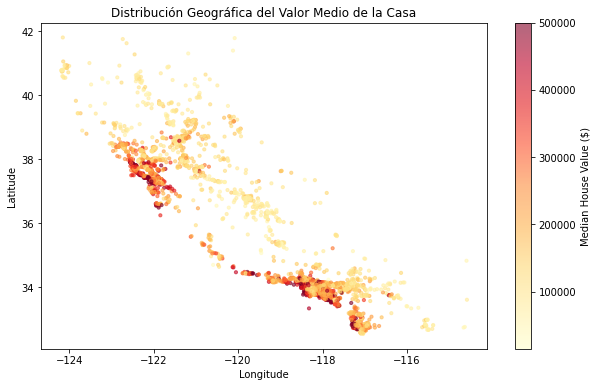

In [106]:

# Crear el gráfico de dispersión ponderado por median_house_value
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    mapa["longitude"], mapa["latitude"],
    c=mapa["median_house_value"], cmap="YlOrRd", alpha=0.6,
    s=10  # Tamaño de los puntos
)

# Agregar una barra de color
cbar = plt.colorbar(scatter)
cbar.set_label("Median House Value ($)")

# Etiquetas y título
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Distribución Geográfica del Valor Medio de la Casa")

# Mostrar el mapa
plt.show()

In [14]:
# Mapa regresion lineal


In [15]:
# Red neuronal


### Calibracion regresion 